In [1]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error ,r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Importing dataset
df=pd.read_csv("smoking.csv")

In [3]:
# view of Dataset
df

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


In [4]:
# Dropping duplicate values 
df.drop_duplicates(inplace=True)

In [5]:
#Dropping columns which are not required for analysis of data
df.drop(columns="ID",inplace=True)

df.drop(columns="oral",inplace=True)

In [6]:
# Data view after removing of columns
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,N,0


### Removing non related columns in Dataset

In [8]:
df.drop(columns=["hearing(right)","dental caries"],inplace=True)

In [9]:
df.drop(columns="hearing(left)",inplace=True)

In [10]:
# Numerical column for correlations 
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

# Print the numerical columns
print(numerical_columns)

corr = df[numerical_columns].corr()
corr

['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)', 'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST', 'ALT', 'Gtp', 'smoking']


,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,smoking
age,1.000000,-0.479528,-0.324706,-0.026297,-0.195472,-0.192723,0.134023,0.050745,0.182351,0.055557,0.015102,0.007047,0.043007,-0.263078,0.029625,-0.106118,0.032576,-0.063937,0.013031,-0.162557
height(cm),-0.479528,1.000000,0.675656,0.378902,0.151133,0.155665,0.080585,0.113193,0.019619,-0.082161,0.156693,-0.213284,-0.048419,0.539367,0.005128,0.383883,0.041737,0.126511,0.139720,0.396675
weight(kg),-0.324706,0.675656,1.000000,0.822842,0.108433,0.113155,0.266131,0.271634,0.136237,0.026403,0.324429,-0.358868,0.040560,0.492970,0.032566,0.324808,0.120130,0.250634,0.209625,0.302780
waist(cm),-0.026297,0.378902,0.822842,1.000000,0.027458,0.037996,0.316922,0.292627,0.211132,0.065467,0.361922,-0.376203,0.072817,0.387066,0.045492,0.235024,0.142690,0.252478,0.243141,0.226259
eyesight(left),-0.195472,0.151133,0.108433,0.027458,1.000000,0.354574,-0.019330,0.005199,-0.041851,-0.004985,0.019717,-0.015296,-0.007257,0.095234,-0.002752,0.071410,-0.007966,0.019326,0.003850,0.061204
eyesight(right),-0.192723,0.155665,0.113155,0.037996,0.354574,1.000000,-0.013720,0.011357,-0.044006,-0.007851,0.019881,-0.022220,-0.006172,0.096119,-0.013511,0.047608,-0.006921,0.024182,0.012195,0.063017
systolic,0.134023,0.080585,0.266131,0.316922,-0.019330,-0.013720,1.000000,0.761051,0.172700,0.059572,0.198826,-0.088487,0.016569,0.186514,0.046170,0.072288,0.083204,0.094893,0.165724,0.073109
relaxation,0.050745,0.113193,0.271634,0.292627,0.005199,0.011357,0.761051,1.000000,0.147879,0.095357,0.215541,-0.089410,0.041017,0.232899,0.045665,0.085033,0.085151,0.106648,0.177648,0.108309
fasting blood sugar,0.182351,0.019619,0.136237,0.211132,-0.041851,-0.044006,0.172700,0.147879,1.000000,0.009903,0.227746,-0.121274,-0.019615,0.099921,0.094047,0.041341,0.068772,0.087616,0.182414,0.100279
Cholesterol,0.055557,-0.082161,0.026403,0.065467,-0.004985,-0.007851,0.059572,0.095357,0.009903,1.000000,0.247581,0.168623,0.738975,0.061503,-0.004259,-0.000129,0.026594,0.050676,0.083531,-0.028548


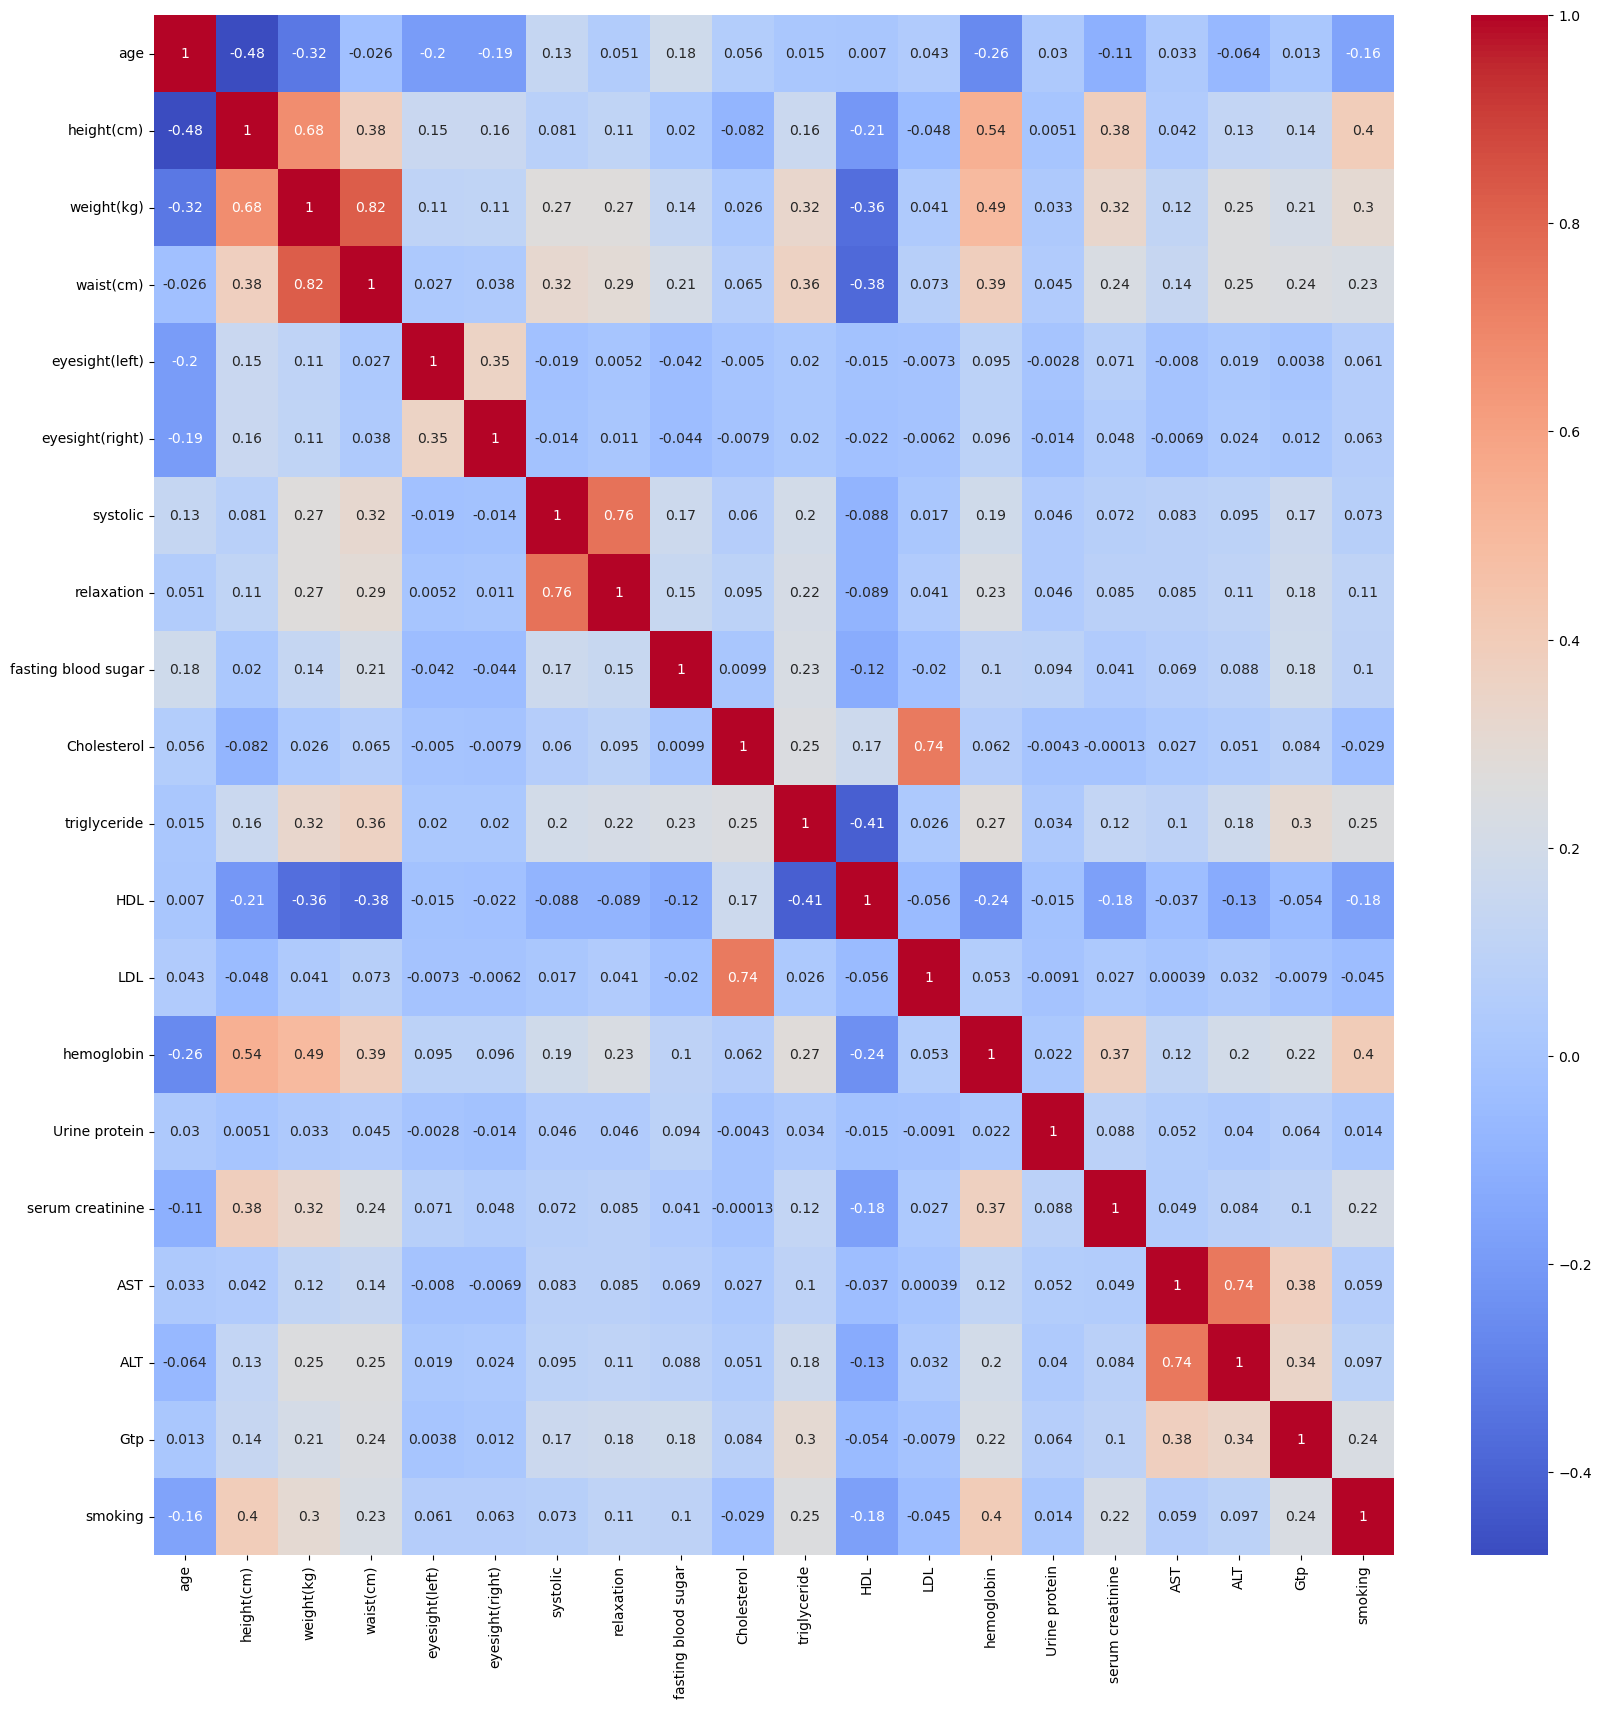

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# showing Outliers

In [13]:
df["gender"]=np.where(df["gender"]=="M",1,df["gender"])
df["gender"]=np.where(df["gender"]=="F",0,df["gender"]) 
df["tartar"]=np.where(df["tartar"]=="Y",1,df["tartar"]) 
df["tartar"]=np.where(df["tartar"]=="N",0,df["tartar"])  


In [14]:
# Function for Checking Outliers
def outliers(x):
    y=x.select_dtypes(include=[int,float])
    for i in y:
        sns.boxplot(x=df[i])
        plt.title(i)
        plt.show()

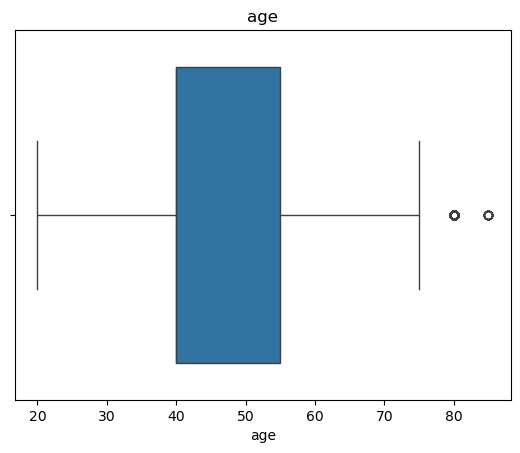

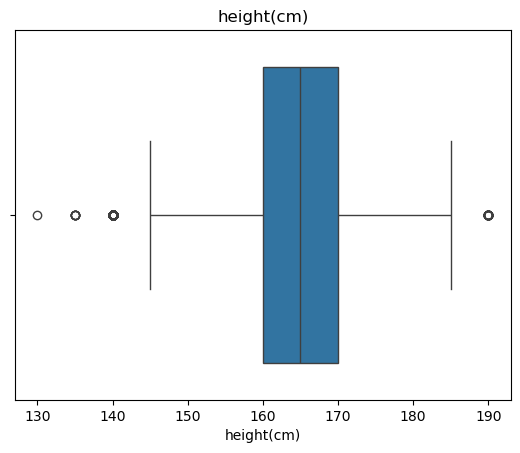

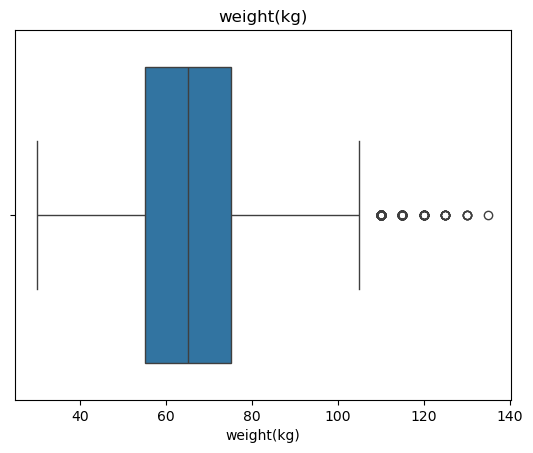

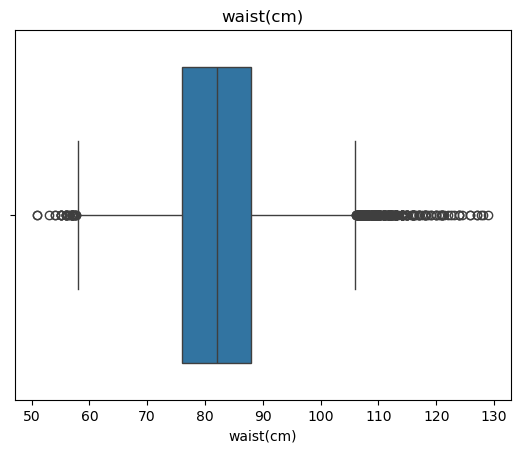

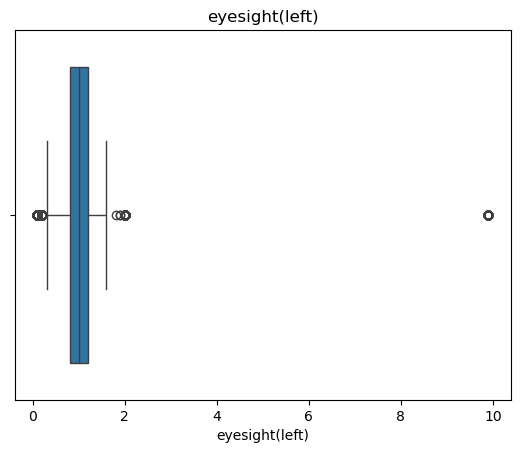

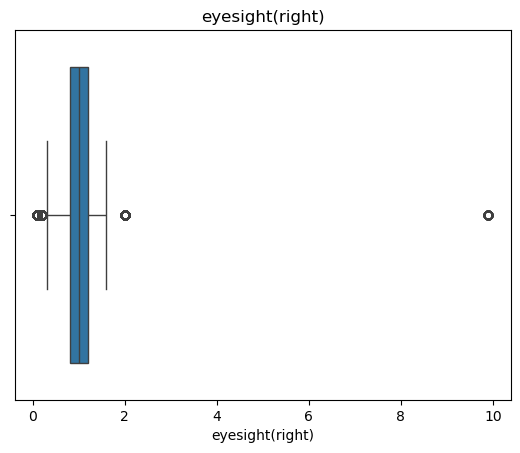

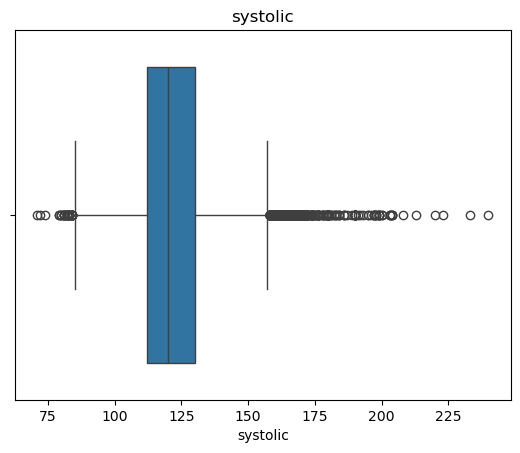

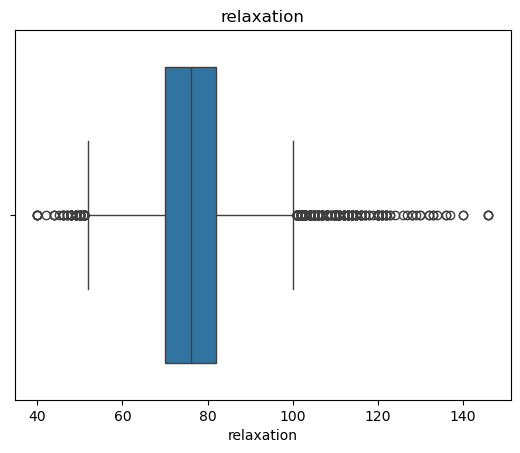

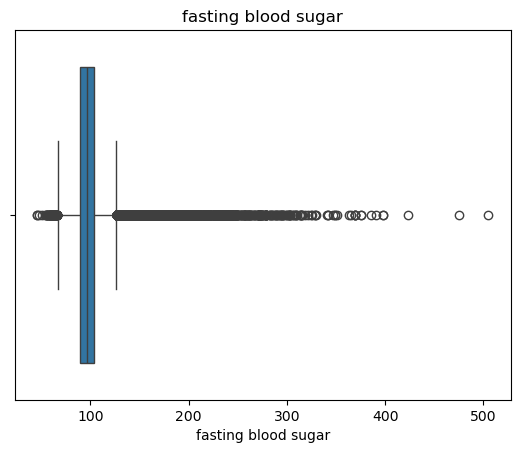

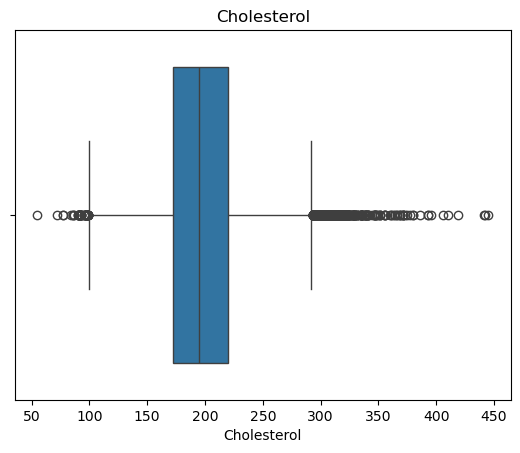

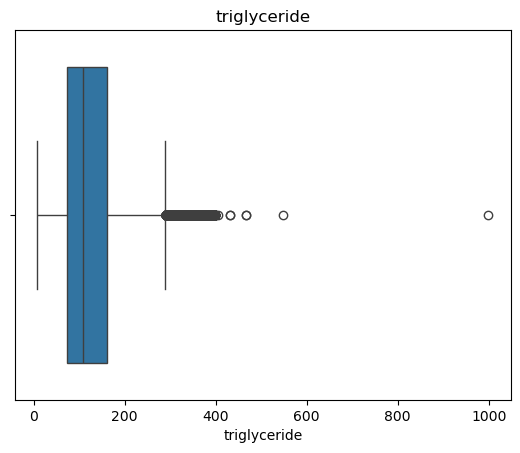

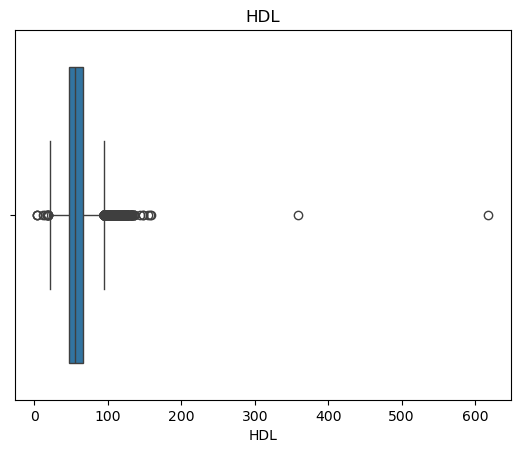

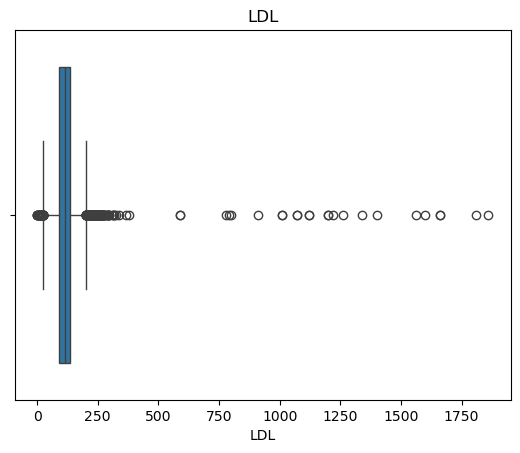

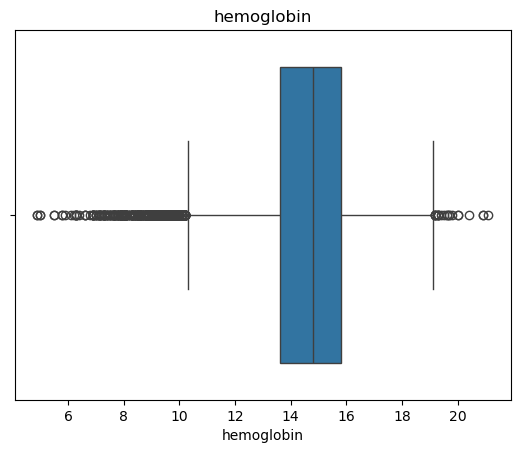

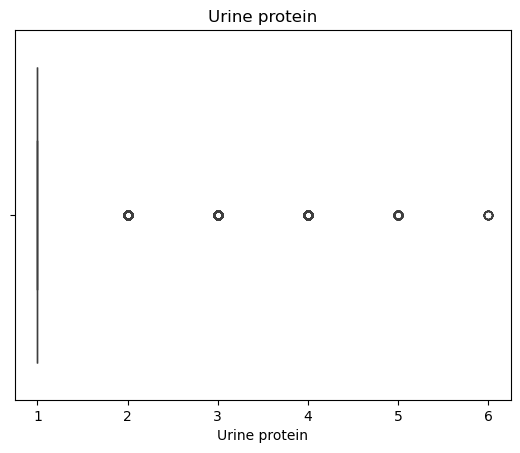

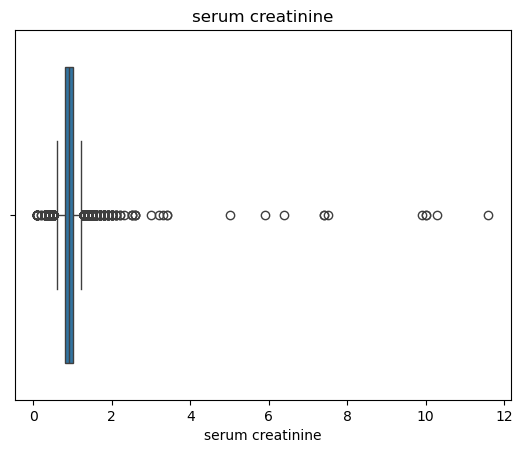

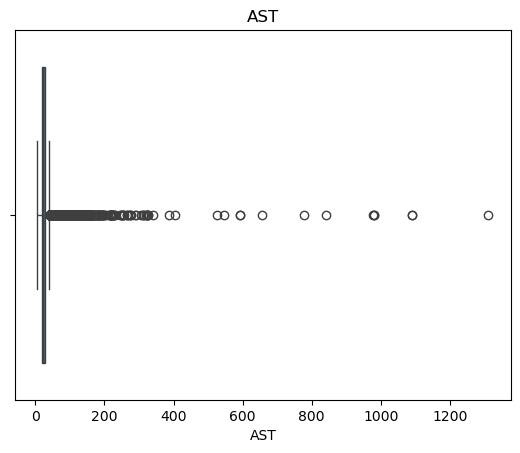

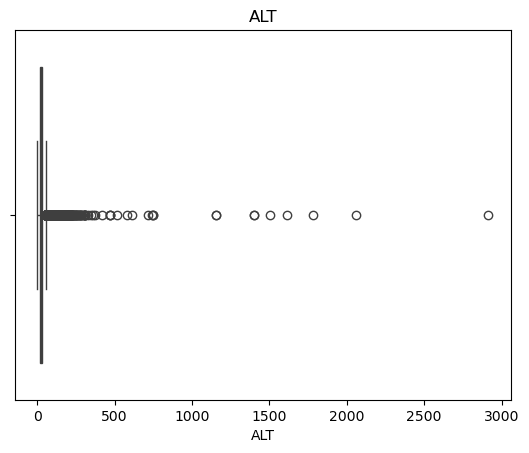

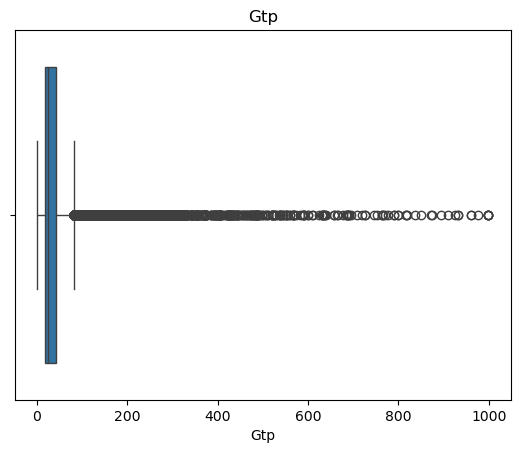

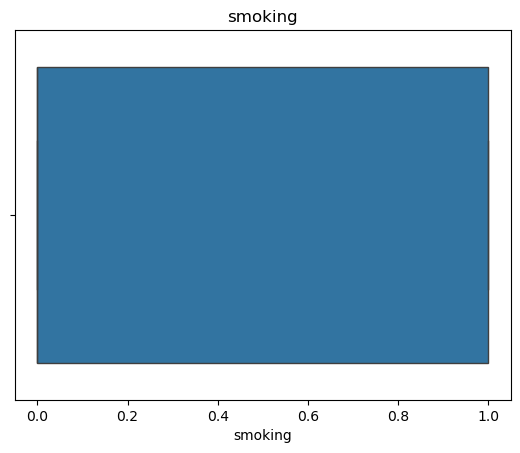

In [15]:
#Function
outliers(df)

# Lower Fence and Upper Fence Functions

In [17]:
# Function for Lower Bound
def LFfenceing(i):
    q1=i.quantile(.25)
    q3=i.quantile(.75)
    IQR=q3-q1
    Lf=q1-(1.5*IQR)
    Uf=q3+(1.5*IQR)
    return Lf
# Function for Upper bound
def UFfenceing(i):
    q1=i.quantile(.25)
    q3=i.quantile(.75)
    IQR=q3-q1
    Lf=q1-(1.5*IQR)
    Uf=q3+(1.5*IQR)
    return Uf

# Removing Outliers

In [19]:
# Removing the Outliers from the Data set 

low=LFfenceing(df["age"])
high=UFfenceing(df["age"])
df["age"] = np.clip(df["age"], low, high)
#-------------------------------------------- 
low=LFfenceing(df["height(cm)"])
high=UFfenceing(df["height(cm)"])
df["height(cm)"]=np.where(df["height(cm)"]>high,high,df["height(cm)"])
df["height(cm)"]=np.where(df["height(cm)"]<low,low,df["height(cm)"])
#-------------------------------------------- 

low=LFfenceing(df["weight(kg)"])
high=UFfenceing(df["weight(kg)"])
df["weight(kg)"]=np.where(df["weight(kg)"]>high,high,df["weight(kg)"])
df["weight(kg)"]=np.where(df["weight(kg)"]<low,low,df["weight(kg)"])
#-------------------------------------------- 

low=LFfenceing(df["waist(cm)"])
high=UFfenceing(df["waist(cm)"])
df["waist(cm)"]=np.where(df["waist(cm)"]>high,high,df["waist(cm)"])
df["waist(cm)"]=np.where(df["waist(cm)"]<low,low,df["waist(cm)"])
#-------------------------------------------- 

low=LFfenceing(df["eyesight(left)"])
high=UFfenceing(df["eyesight(left)"])
df["eyesight(left)"]=np.where(df["eyesight(left)"]>high,high,df["eyesight(left)"])
df["eyesight(left)"]=np.where(df["eyesight(left)"]<low,low,df["eyesight(left)"])
#-------------------------------------------- 

low=LFfenceing(df["eyesight(right)"])
high=UFfenceing(df["eyesight(right)"])
df["eyesight(right)"]=np.where(df["eyesight(right)"]>high,high,df["eyesight(right)"])
df["eyesight(right)"]=np.where(df["eyesight(right)"]<low,low,df["eyesight(right)"])
#-------------------------------------------- 



low=LFfenceing(df["systolic"])
high=UFfenceing(df["systolic"])
df["systolic"]=np.where(df["systolic"]>high,high,df["systolic"])
df["systolic"]=np.where(df["systolic"]<low,low,df["systolic"])
#-------------------------------------------- 

low=LFfenceing(df["relaxation"])
high=UFfenceing(df["relaxation"])
df["relaxation"]=np.where(df["relaxation"]>high,high,df["relaxation"])
df["relaxation"]=np.where(df["relaxation"]<low,low,df["relaxation"])
#-------------------------------------------- 

low=LFfenceing(df["fasting blood sugar"])
high=UFfenceing(df["fasting blood sugar"])
df["fasting blood sugar"]=np.where(df["fasting blood sugar"]>high,high,df["fasting blood sugar"])
df["fasting blood sugar"]=np.where(df["fasting blood sugar"]<low,low,df["fasting blood sugar"])
#-------------------------------------------- 

low=LFfenceing(df["Cholesterol"])
high=UFfenceing(df["Cholesterol"])
df["Cholesterol"]=np.where(df["Cholesterol"]>high,high,df["Cholesterol"])
df["Cholesterol"]=np.where(df["Cholesterol"]<low,low,df["Cholesterol"])
#-------------------------------------------- 

low=LFfenceing(df["triglyceride"])
high=UFfenceing(df["triglyceride"])
df["triglyceride"]=np.where(df["triglyceride"]>high,high,df["triglyceride"])
df["triglyceride"]=np.where(df["triglyceride"]<low,low,df["triglyceride"])
#-------------------------------------------- 

low=LFfenceing(df["HDL"])
high=UFfenceing(df["HDL"])
df["HDL"]=np.where(df["HDL"]>high,high,df["HDL"])
df["HDL"]=np.where(df["HDL"]<low,low,df["HDL"])
#-------------------------------------------- 

low=LFfenceing(df["LDL"])
high=UFfenceing(df["LDL"])
df["LDL"]=np.where(df["LDL"]>high,high,df["LDL"])
df["LDL"]=np.where(df["LDL"]<low,low,df["LDL"])
#-------------------------------------------- 

low=LFfenceing(df["hemoglobin"])
high=UFfenceing(df["hemoglobin"])
df["hemoglobin"]=np.where(df["hemoglobin"]>high,high,df["hemoglobin"])
df["hemoglobin"]=np.where(df["hemoglobin"]<low,low,df["hemoglobin"])
#-------------------------------------------- 

low=LFfenceing(df["serum creatinine"])
high=UFfenceing(df["serum creatinine"])
df["serum creatinine"]=np.where(df["serum creatinine"]>high,high,df["serum creatinine"])
df["serum creatinine"]=np.where(df["serum creatinine"]<low,low,df["serum creatinine"])
#-------------------------------------------- 

low=LFfenceing(df["AST"])
high=UFfenceing(df["AST"])
df["AST"]=np.where(df["AST"]>high,high,df["AST"])
df["AST"]=np.where(df["AST"]<low,low,df["AST"])
#-------------------------------------------- 

low=LFfenceing(df["ALT"])
high=UFfenceing(df["ALT"])
df["ALT"]=np.where(df["ALT"]>high,high,df["ALT"])
df["ALT"]=np.where(df["ALT"]<low,low,df["ALT"])
#-------------------------------------------- 

low=LFfenceing(df["Gtp"])
high=UFfenceing(df["Gtp"])
df["Gtp"]=np.where(df["Gtp"]>high,high,df["Gtp"])
df["Gtp"]=np.where(df["Gtp"]<low,low,df["Gtp"])
#-------------------------------------------- 
#-------------------------------------------- 

low=LFfenceing(df["smoking"])
high=UFfenceing(df["smoking"])
df["smoking"]=np.where(df["smoking"]>high,high,df["smoking"])
df["smoking"]=np.where(df["smoking"]<low,low,df["smoking"])
#-------------------------------------------- 


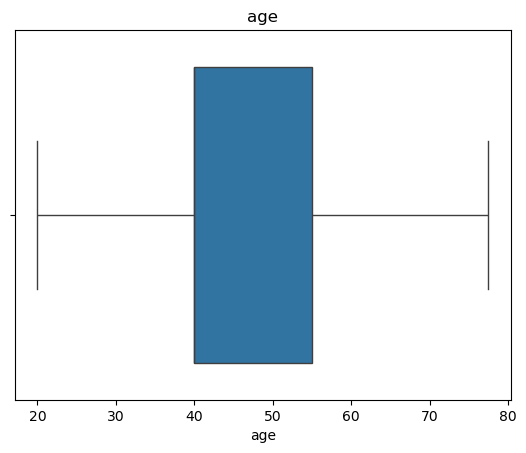

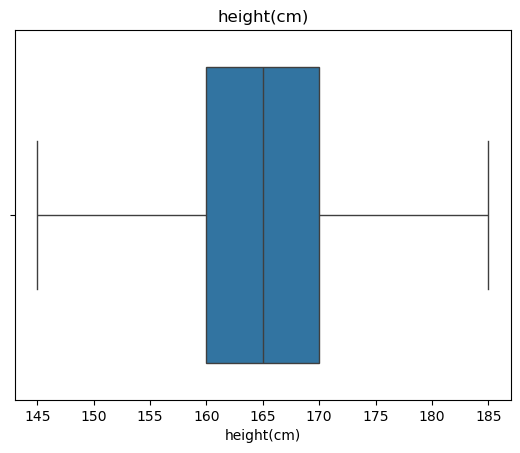

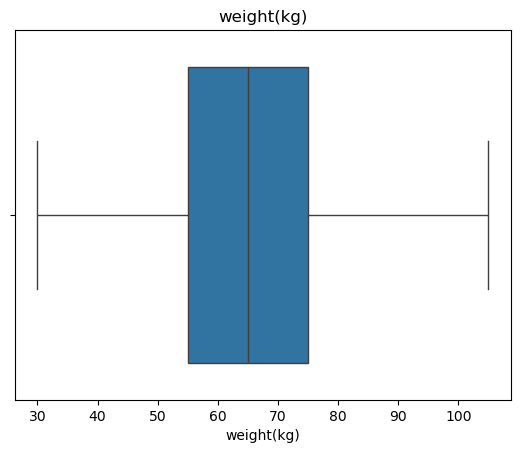

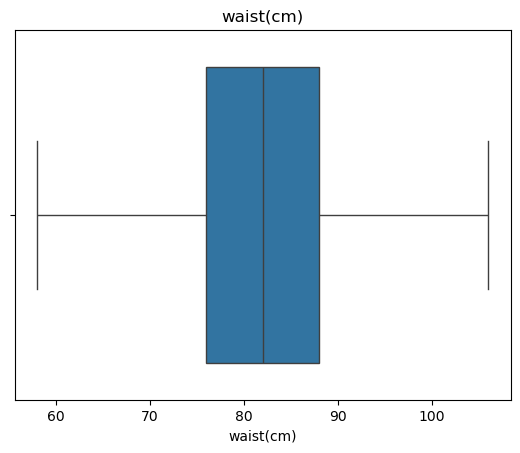

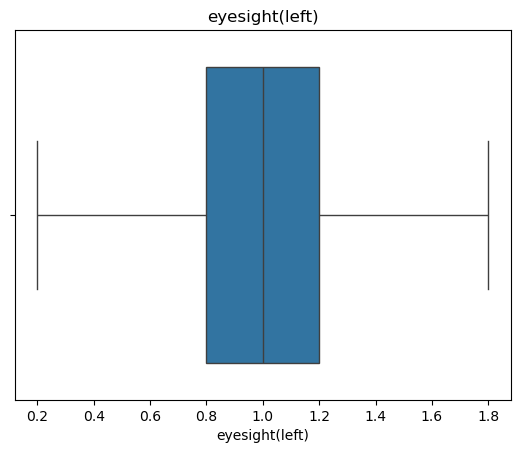

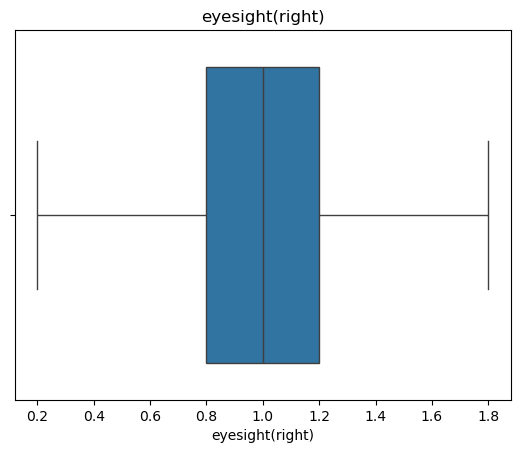

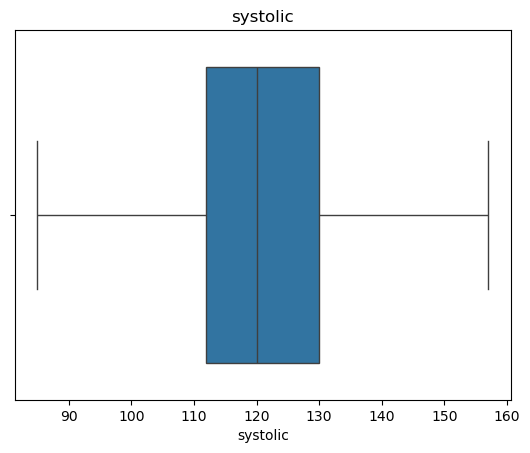

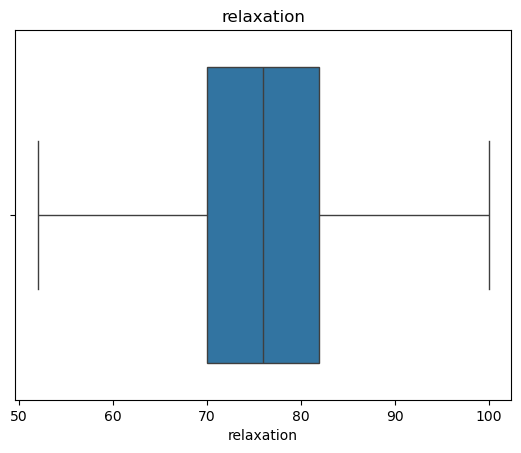

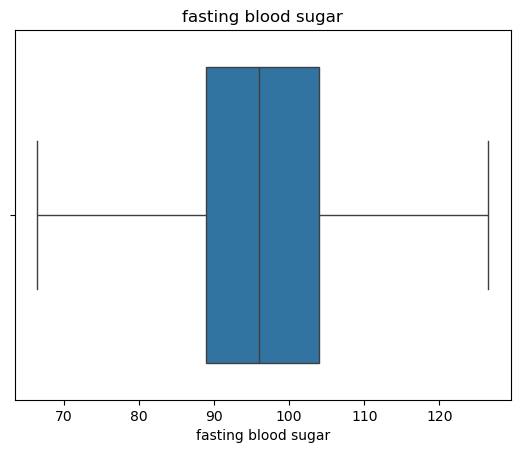

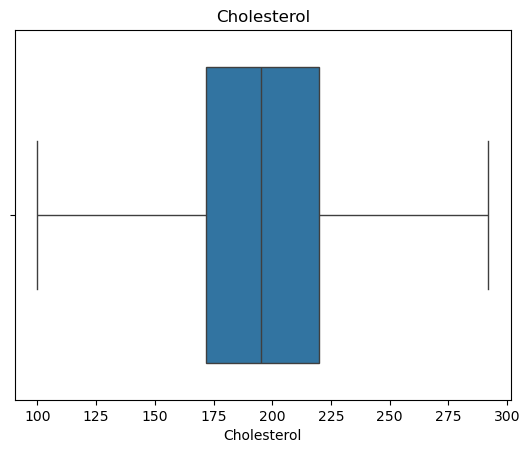

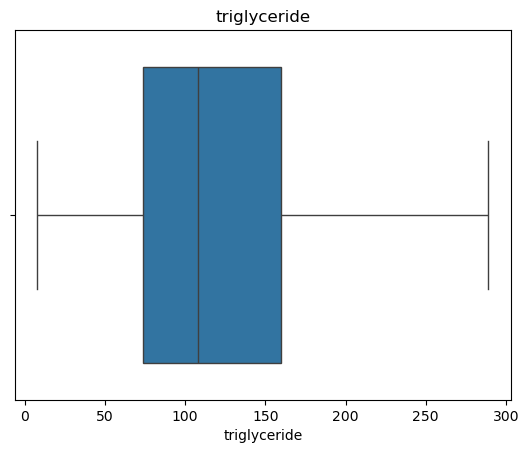

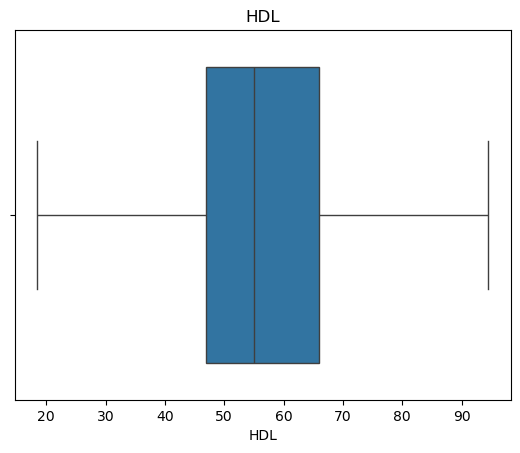

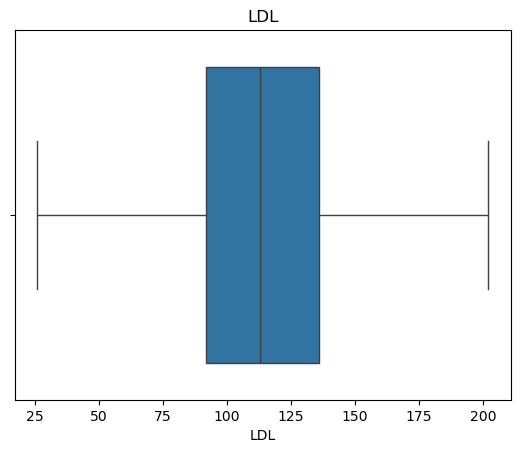

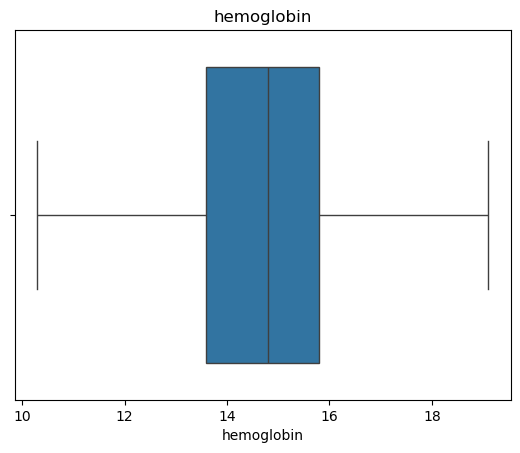

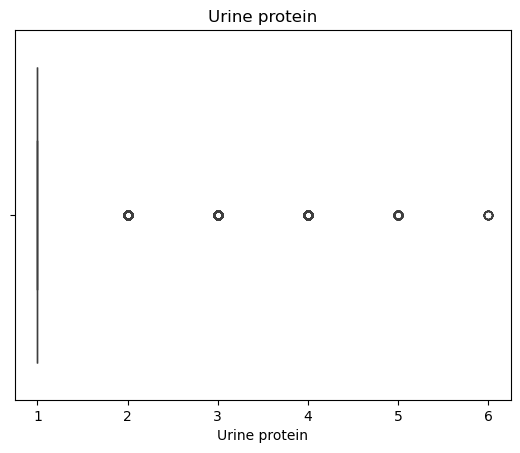

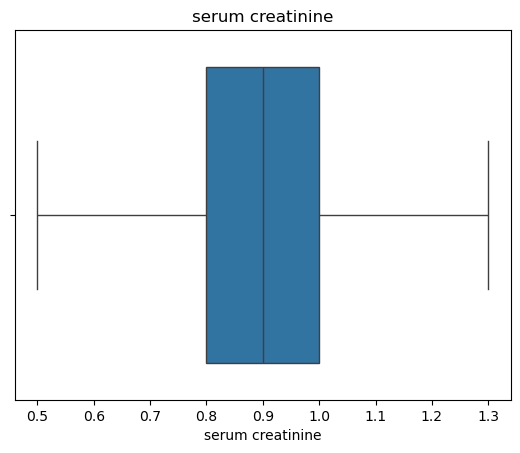

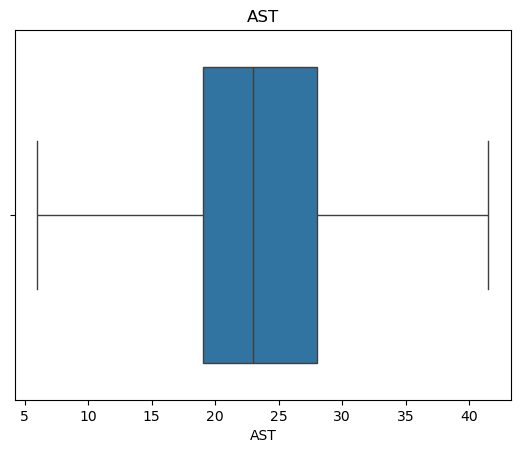

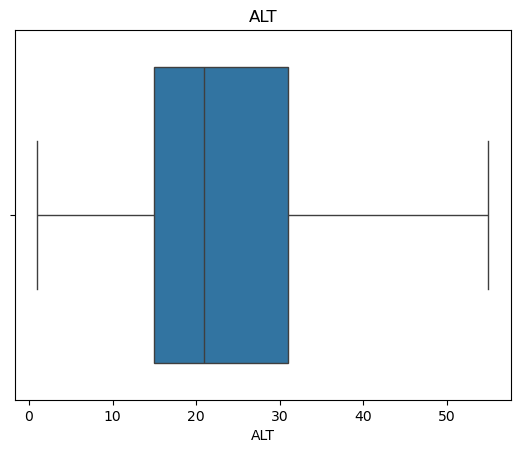

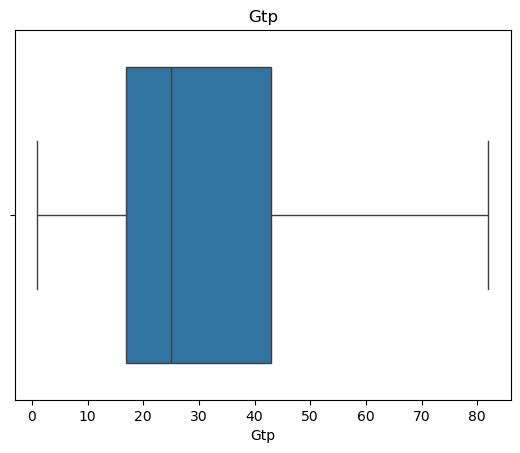

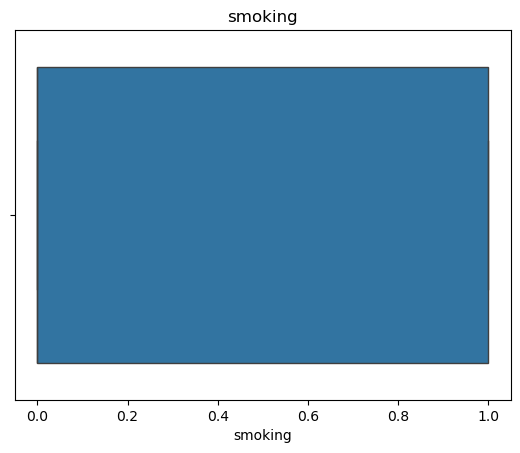

In [20]:
# Checking Outliers after removing Outliers
outliers(df)

In [21]:
# Copying ( df to df1 ) as dummies for Training  as their are no Object type values
df1=df

In [22]:
# copy of Df dataset
df1

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,tartar,smoking
0,0,40.0,155.0,60.0,81.3,1.2,1.0,114.0,73.0,94.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,1,0.0
1,0,40.0,160.0,60.0,81.0,0.8,0.6,119.0,70.0,126.5,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,1,0.0
2,1,55.0,170.0,60.0,80.0,0.8,0.8,138.0,86.0,89.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,1.0
3,1,40.0,165.0,70.0,88.0,1.5,1.5,100.0,60.0,96.0,...,45.0,202.0,14.7,1.0,1.0,19.0,26.0,18.0,1,0.0
4,0,40.0,155.0,60.0,86.0,1.0,1.0,120.0,74.0,80.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40.0,170.0,65.0,75.0,0.9,0.9,110.0,68.0,89.0,...,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,0.0
55688,0,45.0,160.0,50.0,70.0,1.2,1.2,101.0,62.0,89.0,...,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,1,0.0
55689,0,55.0,160.0,50.0,68.5,1.0,1.2,117.0,72.0,88.0,...,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0.0
55690,1,60.0,165.0,60.0,78.0,0.8,1.0,133.0,76.0,107.0,...,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0.0


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  float64
 2   height(cm)           55692 non-null  float64
 3   weight(kg)           55692 non-null  float64
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   systolic             55692 non-null  float64
 8   relaxation           55692 non-null  float64
 9   fasting blood sugar  55692 non-null  float64
 10  Cholesterol          55692 non-null  float64
 11  triglyceride         55692 non-null  float64
 12  HDL                  55692 non-null  float64
 13  LDL                  55692 non-null  float64
 14  hemoglobin           55692 non-null  float64
 15  Urine protein        55692 non-null 

In [24]:
df1

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,tartar,smoking
0,0,40.0,155.0,60.0,81.3,1.2,1.0,114.0,73.0,94.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,1,0.0
1,0,40.0,160.0,60.0,81.0,0.8,0.6,119.0,70.0,126.5,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,1,0.0
2,1,55.0,170.0,60.0,80.0,0.8,0.8,138.0,86.0,89.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,1.0
3,1,40.0,165.0,70.0,88.0,1.5,1.5,100.0,60.0,96.0,...,45.0,202.0,14.7,1.0,1.0,19.0,26.0,18.0,1,0.0
4,0,40.0,155.0,60.0,86.0,1.0,1.0,120.0,74.0,80.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,0,40.0,170.0,65.0,75.0,0.9,0.9,110.0,68.0,89.0,...,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,0.0
55688,0,45.0,160.0,50.0,70.0,1.2,1.2,101.0,62.0,89.0,...,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,1,0.0
55689,0,55.0,160.0,50.0,68.5,1.0,1.2,117.0,72.0,88.0,...,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0.0
55690,1,60.0,165.0,60.0,78.0,0.8,1.0,133.0,76.0,107.0,...,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0.0


In [25]:
# Setting x & y parameter for training and Testing
y=df1["smoking"]
x=df1.drop(columns="smoking")

In [26]:
#Variable Declaration for Training and Testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=88)

In [27]:
# Shape of Dataset on variable
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(44553, 21)
(44553,)
(11139, 21)
(11139,)


In [28]:
# Necessary Information of Df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  float64
 2   height(cm)           55692 non-null  float64
 3   weight(kg)           55692 non-null  float64
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   systolic             55692 non-null  float64
 8   relaxation           55692 non-null  float64
 9   fasting blood sugar  55692 non-null  float64
 10  Cholesterol          55692 non-null  float64
 11  triglyceride         55692 non-null  float64
 12  HDL                  55692 non-null  float64
 13  LDL                  55692 non-null  float64
 14  hemoglobin           55692 non-null  float64
 15  Urine protein        55692 non-null 

# (Decision Tree)

In [30]:
# Decision Tree Model
dt=DecisionTreeClassifier(random_state=88)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=88)

In [31]:
# Printing Train and Test Accuracy
print("Accuracy Train",dt.score(x_train,y_train))
print("Accuracy Test",dt.score(x_test,y_test))

Accuracy Train 1.0
Accuracy Test 0.7884011132058533


# (Logistic Regression)

In [33]:
# Logistic Regression 
log=LogisticRegression()
log.fit(x_train,y_train)

print("Accuracy Train",log.score(x_train,y_train))
print("Accuracy Test",log.score(x_test,y_test))

Accuracy Train 0.7274033173972572
Accuracy Test 0.7249304246341682


# (Random Forest)

In [35]:
# ranadom forest
rm=RandomForestClassifier()
rm.fit(x_train,y_train)


RandomForestClassifier()

In [36]:

# Checking Accuracy Train Test 
print("Accuracy Train",rm.score(x_train,y_train))
print("Accuracy Test",rm.score(x_test,y_test))

Accuracy Train 0.9999775548223464
Accuracy Test 0.8317622766855194


In [37]:
models={"Logistics Regression":LogisticRegression(),
        "Decision Tree Classifier":DecisionTreeClassifier(),
        "Random Forest Classifier":RandomForestClassifier()}

In [38]:
# Fit models , make predictions and compute MSE
Train_Accuracy_Results={} 
Test_Accuracy_Results={} 

for name,model in models.items():
    model.fit(x_train,y_train)
    Acc_train=model.score(x_train,y_train)
    Acc_test=model.score(x_test,y_test)
    Train_Accuracy_Results[name]=Acc_train
    Test_Accuracy_Results[name]=Acc_test

## PRINT (Accuracy of Train ) RESULTS
for name,Acc in Train_Accuracy_Results.items():
    print(f"{name}: Train Accuracy = {Acc}") 

print("+++++++++++++++++++++++++++++++++")
## PRINT (Accuracy of Test ) RESULTS
for name,Acc in Test_Accuracy_Results.items():
    print(f"{name}: Test Accuracy = {Acc}")

## BEST MODEL
#BEST_model= min(MSE_Results,key=MSE_Results.get)
#print("BEST MODEL IS ",{BEST_model})

Logistics Regression: Train Accuracy = 0.7274033173972572
Decision Tree Classifier: Train Accuracy = 1.0
Random Forest Classifier: Train Accuracy = 1.0
+++++++++++++++++++++++++++++++++
Logistics Regression: Test Accuracy = 0.7249304246341682
Decision Tree Classifier: Test Accuracy = 0.7873238172187809
Random Forest Classifier: Test Accuracy = 0.8325702486758236


In [103]:
df2=pd.read_csv("x_train.csv",) 
df3=pd.read_csv("x_test.csv") 
df4=pd.read_csv("y_train.csv") 
df5=pd.read_csv("y_test.csv") 

In [105]:
df3

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,8,M,80,160,65,91.0,0.9,0.7,1.0,1.0,...,94.0,14.5,1.0,1.0,29.0,19.0,39.0,Y,0.0,N
1,17,M,30,165,90,98.0,1.5,1.5,1.0,1.0,...,165.0,15.6,1.0,0.9,20.0,37.0,34.0,Y,0.0,N
2,20,M,40,170,75,81.0,1.5,1.5,1.0,1.0,...,98.0,16.4,1.0,0.7,25.0,32.0,73.0,Y,0.0,N
3,24,M,35,175,70,80.0,1.0,1.0,1.0,1.0,...,160.0,15.3,1.0,0.7,30.0,55.0,50.0,Y,0.0,N
4,25,M,35,160,75,93.0,1.0,1.2,1.0,1.0,...,132.0,14.7,1.0,1.1,35.0,58.0,56.0,Y,0.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,55676,F,40,170,65,75.0,0.9,0.9,1.0,1.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,Y,1.0,Y
11135,55681,F,45,160,50,70.0,1.2,1.2,1.0,1.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,Y,0.0,Y
11136,55683,F,55,160,50,68.5,1.0,1.2,1.0,1.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,Y,0.0,N
11137,55684,M,60,165,60,78.0,0.8,1.0,1.0,1.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,Y,0.0,N


In [ ]:
#Dropping columns which are not required for analysis of data
df2.drop(columns="ID",inplace=True)

df2.drop(columns="oral",inplace=True)
df2.drop(columns=["hearing(left)","hearing(right)","dental caries"],inplace=True)

df2["gender"]=np.where(df2["gender"]=="M",1,df2["gender"])
df2["gender"]=np.where(df2["gender"]=="F",0,df2["gender"]) 
df2["tartar"]=np.where(df2["tartar"]=="Y",1,df2["tartar"]) 
df2["tartar"]=np.where(df2["tartar"]=="N",0,df2["tartar"])

In [113]:
df3

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,tartar,Pred_y
0,1,80,160,65,91.0,0.9,0.7,120.0,80.0,112.0,...,61.0,94.0,14.5,1.0,1.0,29.0,19.0,39.0,0,0.0
1,1,30,165,90,98.0,1.5,1.5,136.0,83.0,96.0,...,58.0,165.0,15.6,1.0,0.9,20.0,37.0,34.0,0,0.0
2,1,40,170,75,81.0,1.5,1.5,138.0,86.0,92.0,...,37.0,98.0,16.4,1.0,0.7,25.0,32.0,73.0,0,1.0
3,1,35,175,70,80.0,1.0,1.0,160.0,100.0,100.0,...,53.0,160.0,15.3,1.0,0.7,30.0,55.0,50.0,0,0.0
4,1,35,160,75,93.0,1.0,1.2,125.0,80.0,117.0,...,58.0,132.0,14.7,1.0,1.1,35.0,58.0,56.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11134,0,40,170,65,75.0,0.9,0.9,110.0,68.0,89.0,...,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,0.0
11135,0,45,160,50,70.0,1.2,1.2,101.0,62.0,89.0,...,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,1,0.0
11136,0,55,160,50,68.5,1.0,1.2,117.0,72.0,88.0,...,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0.0
11137,1,60,165,60,78.0,0.8,1.0,133.0,76.0,107.0,...,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0.0


In [133]:
df5

,ID,smoking
0,8,1
1,17,0
2,20,1
3,24,0
4,25,0
...,...,...
11134,55676,0
11135,55681,0
11136,55683,0
11137,55684,0


In [87]:
ff=pd.DataFrame(df2)

df2["Pred_y"]=log.predict(ff)

In [89]:
df2

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,tartar,Pred_y
0,0,40,155,60,81.3,1.2,1.0,114.0,73.0,94.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,1,0.0
1,0,40,160,60,81.0,0.8,0.6,119.0,70.0,130.0,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,1,0.0
2,1,55,170,60,80.0,0.8,0.8,138.0,86.0,89.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0.0
3,1,40,165,70,88.0,1.5,1.5,100.0,60.0,96.0,...,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,1,0.0
4,0,40,155,60,86.0,1.0,1.0,120.0,74.0,80.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,1,50,170,65,88.0,1.2,1.2,148.0,94.0,102.0,...,40.0,108.0,15.2,1.0,1.0,45.0,49.0,51.0,1,0.0
44549,1,35,175,70,84.0,0.6,0.7,105.0,74.0,88.0,...,57.0,118.0,15.2,1.0,0.9,20.0,14.0,16.0,1,0.0
44550,1,35,175,70,70.9,1.5,1.5,116.0,70.0,95.0,...,41.0,92.0,13.4,1.0,1.0,18.0,19.0,10.0,1,0.0
44551,1,50,165,90,106.8,0.8,0.5,122.0,75.0,91.0,...,47.0,104.0,14.5,1.0,0.9,30.0,49.0,40.0,1,0.0


In [91]:
np.where(df2["Pred_y"]==1)

(array([    5,     6,     7, ..., 44536, 44538, 44543], dtype=int64),)

In [93]:
df2.head(10)

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,tartar,Pred_y
0,0,40,155,60,81.3,1.2,1.0,114.0,73.0,94.0,...,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,1,0.0
1,0,40,160,60,81.0,0.8,0.6,119.0,70.0,130.0,...,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,1,0.0
2,1,55,170,60,80.0,0.8,0.8,138.0,86.0,89.0,...,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0.0
3,1,40,165,70,88.0,1.5,1.5,100.0,60.0,96.0,...,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,1,0.0
4,0,40,155,60,86.0,1.0,1.0,120.0,74.0,80.0,...,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0.0
5,1,30,180,75,85.0,1.2,1.2,128.0,76.0,95.0,...,48.0,129.0,16.2,1.0,1.2,18.0,27.0,33.0,1,1.0
6,1,40,160,60,85.5,1.0,1.0,116.0,82.0,94.0,...,55.0,157.0,17.0,1.0,0.7,21.0,27.0,39.0,1,1.0
7,1,45,165,90,96.0,1.2,1.0,153.0,96.0,158.0,...,34.0,134.0,15.0,1.0,1.3,38.0,71.0,111.0,1,1.0
8,0,50,150,60,85.0,0.7,0.8,115.0,74.0,86.0,...,48.0,149.0,13.7,1.0,0.8,31.0,31.0,14.0,0,0.0
9,1,45,175,75,89.0,1.0,1.0,113.0,64.0,94.0,...,43.0,126.0,16.0,1.0,0.8,26.0,24.0,63.0,0,1.0


In [109]:
#Dropping columns which are not required for analysis of data
df3.drop(columns="ID",inplace=True)

df3.drop(columns="oral",inplace=True)
df3.drop(columns=["hearing(left)","hearing(right)","dental caries"],inplace=True)

df3["gender"]=np.where(df3["gender"]=="M",1,df3["gender"])
df3["gender"]=np.where(df3["gender"]=="F",0,df3["gender"]) 
df3["tartar"]=np.where(df3["tartar"]=="Y",1,df3["tartar"]) 
df3["tartar"]=np.where(df3["tartar"]=="N",0,df3["tartar"])

In [111]:
ff1=pd.DataFrame(df3)

df3["Pred_y"]=log.predict(ff1)

In [131]:
df3.head(6)

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),systolic,relaxation,fasting blood sugar,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,tartar,Pred_y
0,1,80,160,65,91.0,0.9,0.7,120.0,80.0,112.0,...,61.0,94.0,14.5,1.0,1.0,29.0,19.0,39.0,0,0.0
1,1,30,165,90,98.0,1.5,1.5,136.0,83.0,96.0,...,58.0,165.0,15.6,1.0,0.9,20.0,37.0,34.0,0,0.0
2,1,40,170,75,81.0,1.5,1.5,138.0,86.0,92.0,...,37.0,98.0,16.4,1.0,0.7,25.0,32.0,73.0,0,1.0
3,1,35,175,70,80.0,1.0,1.0,160.0,100.0,100.0,...,53.0,160.0,15.3,1.0,0.7,30.0,55.0,50.0,0,0.0
4,1,35,160,75,93.0,1.0,1.2,125.0,80.0,117.0,...,58.0,132.0,14.7,1.0,1.1,35.0,58.0,56.0,0,0.0
5,1,40,170,80,87.5,1.5,1.5,122.0,75.0,89.0,...,54.0,111.0,15.3,1.0,0.9,27.0,24.0,32.0,0,0.0


In [129]:
df4.head(6)

,ID,smoking
0,0,0
1,1,0
2,2,1
3,3,0
4,4,0
5,5,0
